In [2]:
import pandas as pd
import numpy as np
import math as mp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [4]:
###########################
# SECTION 1: QUESTION ONE #
###########################
#Breakdown the data into chunks, preprocess and store each chunk in the list defined below
cit_chunk_list = []  
#Define chunksize
chunksize = 10 ** 4
for chunk in pd.read_csv("Parking_Citations.csv", chunksize=chunksize, low_memory=True):
    cit_chunk_list.append(chunk)
cit_df=pd.concat(cit_chunk_list)

mean_ViolFine=np.mean(cit_df["ViolFine"])
print("The mean violation for all citations before 01-01-2019: $%.9f" %(mean_ViolFine))

The mean violation for all citations before 01-01-2019: $49.163338396


In [5]:
###########################
# SECTION 1: QUESTION TWO #
###########################

cit_Districts=cit_df[ cit_df["PoliceDistrict"].notnull()]

cit_Districts["PoliceDistrict2"]=cit_Districts["PoliceDistrict"].str.lower()

cit_Districts=cit_Districts.replace("notheastern","northeastern")

policeDistricts=cit_Districts["PoliceDistrict2"]

policeDistricts=list(policeDistricts.drop_duplicates())

ViolFines_Balt=[]
for district in policeDistricts:
    violFine=cit_Districts.query("PoliceDistrict2 == '%s'" %(district))
    mean_ViolFine=np.mean(violFine["ViolFine"])
    ViolFines_Balt.append([district, mean_ViolFine])

ViolFines_Balt=sorted(ViolFines_Balt, key=lambda x: x[1], reverse=True)

print("Police distict with highest violation fine is: %s Police District, with mean violation fine of $%.9f" 
      %(ViolFines_Balt[0][0].capitalize(),ViolFines_Balt[0][1]))

/home/ndugnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Police distict with highest violation fine is: Northeastern Police District, with mean violation fine of $60.911735781


Year	No Violation
2004	162
2005	1136
2006	5550
2007	50049
2008	41672
2009	42719
2010	45842
2011	129722
2012	160453
2013	53916
2014	79135
Slope:11220.090909091


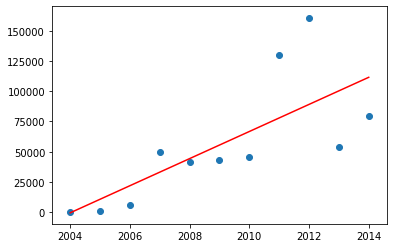

In [6]:
###########################
# SECTION 1: QUESTION THREE #
###########################

#PARKING CITATIONS BETWEEN 2004-2014

cit_chunk_list = []  
#Define chunksize
chunksize = 10 ** 4
for chunk in pd.read_csv("Parking_Citations2004_2014.csv", chunksize=chunksize, low_memory=True):
        cit_chunk_list.append(chunk)

cit_Year=pd.concat(cit_chunk_list)

cit_Year["ViolYear"]=pd.to_datetime(cit_Year["ViolDate"]).dt.year

No_Violations=[]
Years=range(2004,2015)
for year in Years:
    
    Viols=cit_Year.query("ViolYear == %d" %(year))
    count=len(Viols)
    No_Violations.append([year, count])
No_Violations=np.array(No_Violations)


print("Year\tNo Violation")
for item in No_Violations:
    print("%d\t%d" %(item[0], item[1]))

def plotViolations(x, y):
    #Set the linear regression model
    reg_model = LinearRegression()
    #Train the model
    reg_model.fit(x.reshape(-1,1), y.reshape(-1,1))
    # Predict
    viol_predicted = reg_model.predict(x.reshape(-1,1))
    # print the slope
    print('Slope:%.9f' %(reg_model.coef_[0][0]))
    plt.plot(x, viol_predicted, color='r')
    plt.scatter(x,y)

x=No_Violations[:,0]
y=No_Violations[:,1]
plotViolations(x, y)

In [7]:
############################
# SECTION 1: QUESTION FOUR #
############################

cit_OpenPenalty=list(cit_df.query("OpenPenalty > 0.0")["OpenPenalty"])

print("81st percentile of open penalty vehicles : $%.9f" % 
       np.percentile(cit_OpenPenalty, 81))

81st percentile of open penalty vehicles : $480.000000000


In [8]:
###########################
# SECTION 1: QUESTION SIX #
###########################

crime_df=pd.read_csv("Crime_Data.csv")

crime_df=crime_df[crime_df["CrimeDate"].str.contains("2015")]

crime_auto_df=crime_df[crime_df["Description"].str.contains("AUTO THEFT")]

summary_crime_auto_df=crime_auto_df.groupby(["District"], as_index=False).count()

summary_crime_auto_df.rename(columns={'Description': 'AutoThefts'}, inplace=True)

summary_crime_auto_df=summary_crime_auto_df[["District", "AutoThefts"]].drop([8]).reset_index(drop=True)

summary_crime_auto_df=summary_crime_auto_df.sort_values(by=["District"])
print(summary_crime_auto_df)

cit_park_df_2015=cit_df[cit_df["ViolDate"].str.contains("2015")]

cit_park_df_2015 = cit_park_df_2015.loc[cit_park_df_2015['PoliceDistrict'] == cit_park_df_2015["PoliceDistrict"].str.upper()].copy()

summary_cit_park_df=cit_park_df_2015.groupby(["PoliceDistrict"], as_index=False).count()

summary_cit_park_df=summary_cit_park_df[["PoliceDistrict", "Citation"]]

summary_cit_park_df=summary_cit_park_df.sort_values(by=["PoliceDistrict"])
print(summary_cit_park_df)

AutoTheft_ParkCit=summary_cit_park_df.copy()

AutoTheft_ParkCit["AutoThefts"]=summary_crime_auto_df["AutoThefts"]

AutoTheft_ParkCit["Theft/Citation"]=AutoTheft_ParkCit["AutoThefts"]/AutoTheft_ParkCit["Citation"]

AutoTheft_ParkCit=AutoTheft_ParkCit.sort_values(by=["Theft/Citation"], ascending=False)

AutoTheft_ParkCit=AutoTheft_ParkCit.reset_index(drop=True)

print(AutoTheft_ParkCit)

print("The police district with the highest ratio is: %s" %AutoTheft_ParkCit.at[0,"PoliceDistrict"])



    District  AutoThefts
0    CENTRAL         294
1    EASTERN         336
2  NORTHEAST         821
3   NORTHERN         498
4  NORTHWEST         567
5  SOUTHEAST         494
6   SOUTHERN         453
7  SOUTHWEST         557
8    WESTERN         542
  PoliceDistrict  Citation
0        CENTRAL      5383
1        EASTERN      1178
2   NORTHEASTERN      1427
3       NORTHERN      4510
4   NORTHWESTERN       506
5   SOUTHEASTERN      7540
6       SOUTHERN      6186
7   SOUTHWESTERN       907
8        WESTERN       901
  PoliceDistrict  Citation  AutoThefts  Theft/Citation
0   NORTHWESTERN       506         567        1.120553
1   SOUTHWESTERN       907         557        0.614112
2        WESTERN       901         542        0.601554
3   NORTHEASTERN      1427         821        0.575333
4        EASTERN      1178         336        0.285229
5       NORTHERN      4510         498        0.110421
6       SOUTHERN      6186         453        0.073230
7   SOUTHEASTERN      7540         494  